![Machine Learning](https://www.comp.nus.edu.sg/~cs3244/1910/img/banner-1910.png)
---
See **Credits** below for acknowledgements and rights.  For NUS class credit, you'll need to do the corresponding _Assessment_ in [CS3244 in Coursemology](http://coursemology.org/courses/1677) by the respective deadline (as in Coursemology). 

**You must acknowledge that your submitted Assessment is your independent work, see questions in the Assessment at the end.**



**Learning Outcomes for this Week** 

After watching the videos and completing the exercises for this week, you should be able to:

*   Describe the basic idea of Artificial Neural Networks (shortened as ANN or NN):
  * Explain how neural networks combine linear units with a non-linear activation function;
  * Explain the topology of a NN;
  * Given the index of a weight, find it in a graphical representation of a NN (and vice versa).
* Name potential problems with NNs;
* Describe how a neural network is trained using the backpropagation algorithm;
* Name NN regularization techniques;
* Obtain practical experience constructing NNs using PyTorch.

_Welcome to the Week 08 Python notebook._ This week we will learn about **Neural Networks**.  We introduce **Neural Networks** in the lecture videos, and will be reviewing this material in the sixth tutorial.


In this notebook, we will go through Neural Networks. We will be introducing `PyTorch` to work with neural network in this week and coming week's exercises. We will explore a programming exercise to build and train a neural network. In the post-tutorial section, we will go through _Backpropagation Algorithm_ with an example and learn some techniques to improve performance of our neural networks.

---
# Week 08: Pre-tutorial Work

* Watch the CS 3244 video playlist for Week 08 Pre.  This will introduce the main concept for this week's class: _Neural Network_. 
* After watching the videos, complete the pre-tutorial exercises and questions below.

## 1 Basic questions from the videos

**NN Topology**:
For Neural Networks, we will be using the following notation :
* We indicate the layer number in superscript with `[]`. For example, $a^{[2]}$ indicates node $a$ of layer $2$.
* $\Theta_{ij}^{[l]}$ indicates weight of edge from $j$ node of layer $l - 1$ to node $i$ of layer $l$. 


You can find the description of standard notation used here, in the *Materials* folder of Coursemology. ([Download link](https://coursemology.org/courses/1677/materials/folders/38096/files/59020))

The following are some simple questions you should be able to answer after watching the pre-videos.

**Your Turn (Question 1):** Which of the following problems might occur with Neural Networks?

_Choose from: Difficult to optimize, Cannot learn complicated functions, Only usable for classification, Generalize badly, Inflexible_

![Here should be the picture of a neural network](https://www.comp.nus.edu.sg/~mstrobel/pict/NetworkForQuestion2.png)

**Your Turn (Question 2):** In the neural network above, what's the color of the weight $\Theta^{[1]}_{12}$, as defined above?

_Choose from: Violet, Blue, Purple, Black, Brown, Green_

**Your Turn (Question 3):** In the neural network above, identify the black weight (the arrow marked with black).

_Choose from:  $\Theta^{[1]}_{23}$, $\Theta^{[1]}_{32}$, $\Theta^{[2]}_{32}$, $\Theta^{[2]}_{23}$,  $\Theta^{[3]}_{23}$, $\Theta^{[3]}_{32}$_

## 2 The XNOR Gate

In Week 3, we learned that a single perceptron cannot correctly model an XOR Gate (due to its underpowered model representation – a sort of underfitting or bias error). However, one way to solve the problem is to use a combination of two perceptrons. 

Ann heard about this combination idea.  In her work, she needs to implement a related function, the [XNOR](https://en.wikipedia.org/wiki/XNOR_gate) function. You can find its truth table below.

| x1  | x2     | A XNOR B |
|- - -  |- - -  | : - - - : |
| -1  | -1  |  1               |
| -1  | 1  |  -1               |
| 1  | -1  |  -1               |
| 1  | 1  |  1               |

Unfortunately, she got a little distracted from creating a network to solve the problem. Instead, she focused on writing a function that can visualize a network, when given the *layer sizes* and *weights* of a network. 

In [0]:
# This is a library to plot graphs. We use it to visulize the networks.
!apt-get -qq install -y graphviz && pip install -q pydot
!pip install graphviz

# Then let's do the normal imports, including the above library
import numpy as np
from graphviz import Digraph

In [0]:
def drawAFeedForwardNetwork(layers, weights, networkName="Network"):
  """
    Args:
        layers (array of integers): array indicating # of nodes in each layer
        weights (array of floats): The weight vector of our classifier
        networkName (string): name of the network, default value "Network"

    Returns:
        network (Digraph): returns the generated graph
        
  """
  network = Digraph(name=networkName)
  network.graph_attr['rankdir'] = 'LR'
  layerNumber = 0
  
  # Adding all the nodes
  for layer in layers:
    # Iterate through each layer and add nodes
    for node in range(layer):
      # Defining the name of the node
      if (layerNumber == 0):
        nodeName = "x{}".format(node+1)
      else:
        nodeName = "a"
      network.node("{}{}".format(layerNumber,node),nodeName,fontname="Symbol")
      
    # For all but the last layer, we add the bias term
    if(layerNumber+1 != len(layers) ):
      network.node("{}{}".format(layerNumber,"b"),"1")
    layerNumber += 1;
    
  # Adding the edges
  for layer in range(layerNumber-1):
    for innode in range(layers[layer+1]):
      for outnode in range(layers[layer]):
        network.edge("{}{}".format(layer,outnode),"{}{}".format(layer+1,innode),str(weights[layer][outnode][innode]))
      network.edge("{}{}".format(layer,"b"),"{}{}".format(layer+1,innode),str(weights[layer][layers[layer]][innode]))
  
  # Finally we add the output arrow
  network.node("out","h(x)",shape='plaintext')
  network.edge("{}{}".format(layerNumber-1,0),"out")
  
  return network  
  

Oops!  Ann ran out of time, and now she's turning to you, her ML teammate, for some help.  

She already entered some of weights that she's certain can help construct the function but she's missing a few edges' weights. Can you help her finish the network? Note that the _activation function_, $g(x)$, in each node is $sign()$. 
The $sign()$ function is defined as follows 
$$ sign(z) = \begin{cases} 1 &\text{if }z> 0\\
0 &\text{if } z = 0\\
-1 &\text{if } z < 0  
\end{cases}$$

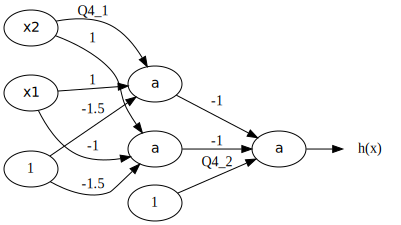

In [0]:
# This is the network Ann created
weights = np.asarray([[[-1,1],[1,"Q4_1"],[-1.5,-1.5]],[[-1],[-1],["Q4_2"]]])
drawAFeedForwardNetwork([2,2,1],weights)

In [0]:
#@title Your Turn (Question 4): What should the value of Q4_1 and Q4_2 be so that the whole network becomes an XNOR function, as defined in the table above? Put your answers here, as well as in the assessment.
Q4_1 = -1.5 #@param {type:"number"}
Q4_2 = -1.5 #@param {type:"number"}

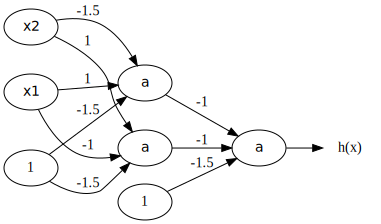

In [0]:
Qweights = np.asarray([[[-1,1],[1,Q4_1],[-1.5,-1.5]],[[-1],[-1],[Q4_2]]])
drawAFeedForwardNetwork([2,2,1],Qweights)

Suppose now, after creating some artificial datasets, Ann wants to train a neural network that outputs XNOR using the $sign()$ activation function in the hidden layers by backpropagation. She used the same neural network topology, but instead of using the weights above, she initialised the weights of her neural network randomly. After training several epochs, she realised that the weights of her neural network remained unchanged.    


**Your Turn (Question 5):** What could be the problem with Ann's neural network?

_Choose from:
The gradient of `sign()` is $0$ everywhere, hence backpropagation would have resulted in no change of weights; The `sign()` function is discontinuous so she is unable to do backpropagation on a discontinuous (hence, non-differentiable) function; She did not collect enough data; She did not ensure that the weights were non-zero._

## 3 Programming : Introducing PyTorch

So far in this course, we have relied mostly on the [scikit learn](http://scikit-learn.org/stable/index.html) library, which contains many implementations of ML algorithms. Unfortunately, its implementations of neural networks are rather limited.  Importantly, there is no graphical processing unit (GPU) support for general computation, so crucial to the training of larger networks.  Thus, we wouldn't want to use it for training NNs.

So, for this part of the course, we will use PyTorch, one of the major open source neural network libraries. If you find that you don't like PyTorch, you can check out [Tensorflow](https://www.tensorflow.org/), [Keras](https://keras.io/) or [FastAI](http://www.fast.ai/) (or any other you might find), but we introduce PyTorch as it has particularly good modularization that is helpful for teaching.

To get started we import pytorch packages.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from  sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

### .a Create a dataset to work on

Let's start by creating a data set.

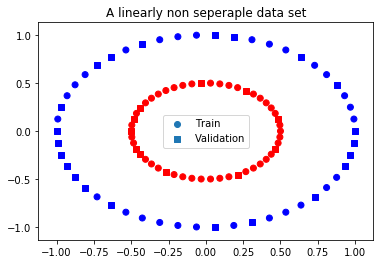

In [0]:
# We first create some points in the 2D space
x,y = sklearn.datasets.make_circles(n_samples=100, random_state=42,factor=0.5)

# Here we split them in training and validation set
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=42)

# And now we can plot them
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="bwr")
plt.scatter(X_val[:,0],X_val[:,1],c=y_val,cmap="bwr",marker="s")
plt.title("A linearly non seperaple data set")
plt.legend(["Train","Validation"])
plt.show()

### .b Load the dataset in `DataLoader`

To be able to use the data set with  PyTorch we have to transform the numpy arrays to  **tensors** , which are basically the PyTorch version of an array (if you want to learn more about them see for example [here](https://pytorch.org/tutorials/beginner/examples_tensor/two_layer_net_tensor.html)).

Next, we create **Data loaders**. So far to iterate through our training data we just used a `for` loop. A more elegant way to do this is using a data loader, here you can easily configure if you want to shuffle your data, how many examples you one to use in each step (i.e. the batch size ) and many other things.



In [0]:
# Here we transform our numpy arrays to Tensors
X_train_T, X_val_T, y_train_T, y_val_T = torch.from_numpy(X_train),torch.from_numpy(X_val), torch.from_numpy(y_train), torch.from_numpy(y_val)

# Here we create data loaders
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train_T.float(),y_train_T.float().view(-1,1)), batch_size=100)

validationloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val_T.float(),y_val_T.float().view(-1,1)), batch_size=100)

### .c Build a Simple NN

Equiped with the data, we can now define a neural network:

In [0]:
net = nn.Sequential(
    #maps linearly, a vector of 2 dimension, with bias, into a 1 dimensional input 
    nn.Linear(in_features = 2, out_features = 1, bias = True),
    #the single output is then fed in to the sigmoid activation function
    nn.Sigmoid()
)

Here's another way that we could use to define the same neural network:

In [0]:
#Define neural network by creating it as a subclass of nn.Module
class Net(nn.Module):

  #Object initialisation in python, can be customised
  #to have other variables
  def __init__(self, input_size = 2, output_size = 1):
    #Creating the object net
    super(Net, self).__init__()
    #Maps linearly with bias, y = Wx + b
    self.linear1 = nn.Linear(input_size, output_size, True)
    #Sigmoid function
    self.sigmoid = nn.Sigmoid()

  #Tells the neural net how to feedforward a input x
  #this forward will also be subsequently tell the 
  #the module how to calculate the backpropagated gradients 
  def forward(self, x):
    x = self.linear1(x)
    #Alternatively, can choose to do x = torch.Sigmoid(x) instead
    #and we declare one fewer layer in __init__
    x = self.sigmoid(x)
    #returns the output we calculated
    return x  

net = Net(2,1)

Here is an explanation of the lines above:

* [nn.Sequential](https://pytorch.org/docs/stable/nn.html#torch.nn.Sequential)  is a sequential container that will create a network, out of the layers (or subnetworks) that are passed into it, in exactly the order they are passed in. It can be used to create simple networks. For example in the codeblock above, we map linearly, a vector of two features to 1 feature with bias, and thereafter, we feed the outputs to a sigmoid function. The diagram is a visualisation of how the neural network looks like in detail:

 ![Image of NN above](https://raw.githubusercontent.com/monikernemo/CS3244-Images/master/Neural%20Network.PNG)  
But typically, one would lump the activation function with the hidden layers and not separate it into two nodes. However, we show the linear output and activation function separately to illustrate what nn.Sequential tries to do.

* [nn.Linear](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) is a basic linear layer $\mathbf{y} =\mathbf{W^\top x}+\mathbf{b}$ where our input is the $2$ dimensional vector, the weight matrix $\mathbf{W}$ is a $2\times1$ matrix, and the bias weights, $\mathbf{b}$ is a $1$ dimensional vector. It doesn't really map linearly in the sense of linear algebra because of the bias, but it is really an affine linear transformation, so essentially, matrix multiplication and adding of constants. In general, suppose $\mathbf{x}$ has input dimensions of $n$, then $\mathbf{W}$ can be a $n\times m$ matrix and $\mathbf{b}$ a $m$ dimensional vector and $\mathbf{y} =\mathbf{W^\top x}+\mathbf{b}$ would be a $m$ dimensional vector as well.

* [nn.Sigmoid](https://pytorch.org/docs/stable/nn.html#torch.nn.Sigmoid) this is the Sigmoid function, $\sigma$ we have seen before  (in Week 4). But of course, since we are working with multiple inputs, this Sigmoid function can take in vector-values and gives out vector values. More concretely, suppose $\mathbf{x} = (x_1, x_2, \dots, x_n)$ then we "abuse notation" and allow  $\sigma(\mathbf{x}) = (\sigma({x_1}), \sigma({x_2}), \dots , \sigma(x_n))$. Typically, this is what happens for almost all activation functions.


### .d Loss Function and Optimizer in PyTorch

PyTorch also provides predefined loss functions and optimizers. Here we use:

* [nn.BCEoss](https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss) as a loss function. It measures the Binary Cross Entropy between the output of the network and the actual label. We actually have seen it before as the Log-Likelihood loss in Week 4.  
To recap, suppose we have a binary classification problem, where $(\mathbf{x}^{(j)}, y^{(j)})$ is a training pair with $y^{(j)} \in \{0, 1\}$ and let $h: \mathbb{R}^n \rightarrow [0,1] $ be our classifier/hypothesis. The Binary Cross Entropy loss is the following loss function: $j(h, \mathbf{x}_i) = -y^{(j)}\log [h(\mathbf{x}^{(j)})]  - (1-y^{(j)})[1 - \log h(\mathbf{x}^{(j)})]$. Intutively, when $y^{(j)} = 1$, we want $\mathbf{x}^{(j)}$ to be close to 1 so it has high cost when $\mathbf{x}^{(j)}$ is close to zero since we take $\log h(\mathbf{x}^{(j)})$. On the other hand if $y^{(j)} = 0 $ then we want $\mathbf{x}^{(j)}$ close to $0$.

* [optim.SGD](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) as an optimizer, and as the name suggest this is *Stochastic Gradient Descent*. We have to link the weights of the network to the optimizer (i.e. net.parameters) and give it a learining rate, here we use 0.1. There are many other optimizers and more parameters to tune.

In [0]:
# Can have other loss function such as, Mean Square Error
# but Binary Cross Entropy loss is more useful for binary 
# classification problem

loss = nn.BCELoss()
# Params - refers to the neural network's parameter that we want to optimise 
# lr - refers to the learning rate we want to train 
opt = optim.SGD(params = net.parameters(), lr = 1e-1)

### .e Train our NN

Now, we can write our `train` function:

In [0]:
def train(model, trainloader, validationloader, lossfunction, optimizer, n_epochs=100):
  """
    Args:
        model (pytorch neural network): the network we want to train
        trainloader (data loader): The data loader for the training set
        validationloader (data loader): The data loader for the validation set
        lossfunction (a pytorch loss function): The loss function used to train the network
        optimizer (a pytorch optimizer ): The optimizer used to train the network
        n_epochs (int): The number of epochs the network is trained 
        (epoch is just the number of times the model backpropagates/trains on the entire data set)
    Returns:
        trainingLosses,validationLosses (Lists of floats): returns the generated graph
        
  """
  trainingLosses, validationLosses = [],[]
  for t in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader):
      inputs, labels = data
      inputs, labels = Variable(inputs), Variable(labels).float() # See the comments below (1)

      optimizer.zero_grad()   # See the comments below (2)

      outputs = model(inputs) # See the comments below (3)
      
      # Compute the loss
      loss = lossfunction(outputs, labels) 
      # Compute the gradient for each variable
      loss.backward()  
      #Update the weights according to the computed gradient in previous step
      #Remember that optimiser already has the information of weights to be 
      #optimised in previous code block
      optimizer.step() 
      
      # for printing
      running_loss += loss.data.item()
      
    # This second loop is actually just calculating the loss in the validation set
    # Otherwise, it's the same as above
    running_loss_val = 0.0
    for i, data in enumerate(validationloader):
      inputs, labels = data
      inputs, labels = Variable(inputs), Variable(labels).float()
      outputs = model(inputs) 
      loss = lossfunction(outputs, labels) # Compute the loss
      
      # for printing
      running_loss_val += loss.data.item()
    trainingLosses.append(running_loss)
    validationLosses.append(running_loss_val)
    # you can set this for every epoch or every say, 5 samples
    if t % 5 == 5-1:
      print("Epoch: {} Training loss: {:f} Validation loss: {:f}".format(t+1,running_loss,running_loss_val))
  return trainingLosses,validationLosses

**Notes on the train function**:

1. `Variable(inputs)` here a `Tensor` is converted to a `Variable`. PyTorch automatically calculates the gradient towards `Variables`. A functionality you can read more about [here](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). Actually, this functionality got recently moved into `Tensors`, so in newer versions of PyTorch you don't need to make this call anymore. However, for the version we use in this notebook we still need it.
2.   `optimizer.zero_grad()` sets the gradients of the parameters back to zero. In PyTorch the gradients are saved as an attribute of the parameters and if they are not set to zero after each update, they will accumulate an lead to arbitrary results.
3. `outputs = model(inputs)`  this is actually one of the nicest features of PyTorch you can just call a network like a function and it maps an input to an output. 

**Let's continue** with our training!

In [0]:
train(net,trainloader,validationloader,loss,opt);

Epoch: 5 Training loss: 0.699005 Validation loss: 0.852833
Epoch: 10 Training loss: 0.697178 Validation loss: 0.845965
Epoch: 15 Training loss: 0.695550 Validation loss: 0.839780
Epoch: 20 Training loss: 0.694095 Validation loss: 0.834204
Epoch: 25 Training loss: 0.692789 Validation loss: 0.829171
Epoch: 30 Training loss: 0.691612 Validation loss: 0.824624
Epoch: 35 Training loss: 0.690549 Validation loss: 0.820511
Epoch: 40 Training loss: 0.689585 Validation loss: 0.816786
Epoch: 45 Training loss: 0.688709 Validation loss: 0.813408
Epoch: 50 Training loss: 0.687910 Validation loss: 0.810342
Epoch: 55 Training loss: 0.687181 Validation loss: 0.807555
Epoch: 60 Training loss: 0.686513 Validation loss: 0.805020
Epoch: 65 Training loss: 0.685900 Validation loss: 0.802709
Epoch: 70 Training loss: 0.685337 Validation loss: 0.800602
Epoch: 75 Training loss: 0.684820 Validation loss: 0.798678
Epoch: 80 Training loss: 0.684343 Validation loss: 0.796918
Epoch: 85 Training loss: 0.683904 Validat

### .f Visualize the Results

Hm... the loss doesn't seem to go down much. Let's see maybe the classifier works good anyway. We have the following visualization of the result.

In [0]:
def plotResults(net,X_train,y_train,X_val,y_val,title=""):
  """
    Args:
        net (pytorch neural network): The network we want to take a look at
        X_train (numpy array): The training points
        y_train (numpy array): The the training labels
        X_val (numpy array): The validation points
        y_val (numpy array): The validation labels
        title (string): The title of out plot
  """
  # Here we create a grid to see the value of our network on many points in the area
  X = np.arange(X_train[:,0].min()*1.2,X_train[:,0].max()*1.2, 0.01)
  Y = np.arange(X_train[:,1].min()*1.2,X_train[:,1].max()*1.2, 0.01)
  X, Y = np.meshgrid(X, Y)
  
  # Now we evaluate the network
  Z = np.zeros(X.shape).flatten()
  for i,[x,y] in enumerate(zip(X.flatten(),Y.flatten())):
    Z[i] = np.asarray(net(Variable(torch.Tensor([x,y])).float()).data)
  Z = Z.reshape(X.shape)

  # Standard figure definition
  fig = plt.figure(figsize=[10,5])
  ax = fig.add_subplot(111)
  ax.set_xlim(X_train[:,0].min()*1.1,X_train[:,0].max()*1.1)
  ax.set_ylim(X_train[:,1].min()*1.1,X_train[:,1].max()*1.1)

  # The next line plots the contour
  ax.contourf(X, Y, Z,cmap='bwr',alpha=0.8)
  plt.title(title)
  plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="bwr")
  plt.scatter(X_val[:,0],X_val[:,1],c=y_val,cmap="bwr",marker="s")
  plt.show()

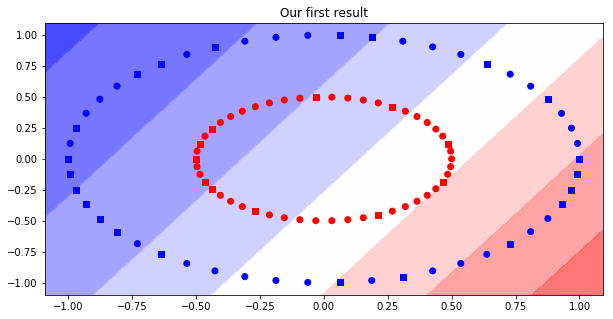

In [0]:
plotResults(net,X_train,y_train,X_val,y_val,title="Our first result")

Okay, that doesn't look good at all. But that's not too surprising, our network structure is only one layer (we actually just did logistic regression from Week $03$), so we created a linear classifier. That cannot work. Let's try to create an actual network.

### .g Build your own NN

**Your Turn (Question 6)**: Define a network `net2` with one additional hidden layer, that can actually solve the problem.

**Tips:**

* If you just add a ```nn.Linear```, you will still end up with a linear classifier. You'll need to add a [nonlinear activation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). ```nn.ReLU()``` works fine, but you can try out others.

* The network doesn't need to be complex, one extra layer and a couple of nodes should be enough.

* Make sure that the output of the first linear layer and the input of the second linear layer have the same size.

* Don't forget to redefine the ```optimizer```. It needs to be linked to the parameters of the network.

* You might need to increase the number of epochs, to get a perfect result. Please don't go crazy with it as if you go beyond 10,000, you might just crash your computer.  You have been warned.

In [0]:
######
# Write your code here, referencing the previous net block
# Feel free to modify
######

net2 = nn.Sequential(
  nn.Linear(in_features = 2, out_features = 8, bias=True),
    nn.ReLU(),
    nn.Linear(in_features = 8, out_features = 1, bias=True),
    nn.Sigmoid()
)




Epoch: 5 Training loss: 0.591349 Validation loss: 0.318278
Epoch: 10 Training loss: 0.379882 Validation loss: 0.302779
Epoch: 15 Training loss: 0.316054 Validation loss: 0.331900
Epoch: 20 Training loss: 0.293541 Validation loss: 0.352764
Epoch: 25 Training loss: 0.282074 Validation loss: 0.360634
Epoch: 30 Training loss: 0.272890 Validation loss: 0.359541
Epoch: 35 Training loss: 0.266704 Validation loss: 0.353960
Epoch: 40 Training loss: 0.262093 Validation loss: 0.347266
Epoch: 45 Training loss: 0.258239 Validation loss: 0.340869
Epoch: 50 Training loss: 0.255269 Validation loss: 0.334964
Epoch: 55 Training loss: 0.253093 Validation loss: 0.329644
Epoch: 60 Training loss: 0.251463 Validation loss: 0.325023
Epoch: 65 Training loss: 0.250154 Validation loss: 0.321342
Epoch: 70 Training loss: 0.249022 Validation loss: 0.318409
Epoch: 75 Training loss: 0.248230 Validation loss: 0.315952
Epoch: 80 Training loss: 0.247731 Validation loss: 0.313842
Epoch: 85 Training loss: 0.247303 Validat

([1.071715235710144,
  0.9073522686958313,
  0.7764667272567749,
  0.6727400422096252,
  0.5913485288619995,
  0.5267531871795654,
  0.4760132133960724,
  0.43614858388900757,
  0.4044928252696991,
  0.37988168001174927,
  0.36061710119247437,
  0.34542524814605713,
  0.3335300385951996,
  0.3238507807254791,
  0.3160535395145416,
  0.30984288454055786,
  0.30457210540771484,
  0.30017808079719543,
  0.2966119050979614,
  0.29354128241539,
  0.2909495234489441,
  0.28865188360214233,
  0.28639787435531616,
  0.28429150581359863,
  0.2820742726325989,
  0.27977776527404785,
  0.27773430943489075,
  0.27593332529067993,
  0.27435851097106934,
  0.2728896141052246,
  0.2715098559856415,
  0.27020636200904846,
  0.26896902918815613,
  0.2677900493144989,
  0.26670438051223755,
  0.2657082676887512,
  0.26475194096565247,
  0.2638322710990906,
  0.2629466652870178,
  0.2620927691459656,
  0.26126861572265625,
  0.26047247648239136,
  0.25970274209976196,
  0.25895801186561584,
  0.258239060

**Your Turn**: Now go ahead and train `net2` as we trained the first network above. 

In [0]:
######
# Write your training code here
opt2 = optim.SGD(params = net2.parameters(), lr = 1e-1)
train(net2,trainloader,validationloader,loss,opt2, n_epochs= 1000);
######

Epoch: 5 Training loss: 0.244146 Validation loss: 0.260316
Epoch: 10 Training loss: 0.242345 Validation loss: 0.263463
Epoch: 15 Training loss: 0.240929 Validation loss: 0.265202
Epoch: 20 Training loss: 0.239678 Validation loss: 0.265975
Epoch: 25 Training loss: 0.238501 Validation loss: 0.266092
Epoch: 30 Training loss: 0.237364 Validation loss: 0.265782
Epoch: 35 Training loss: 0.236248 Validation loss: 0.265204
Epoch: 40 Training loss: 0.235152 Validation loss: 0.264428
Epoch: 45 Training loss: 0.234058 Validation loss: 0.263548
Epoch: 50 Training loss: 0.232967 Validation loss: 0.262605
Epoch: 55 Training loss: 0.231882 Validation loss: 0.261614
Epoch: 60 Training loss: 0.230787 Validation loss: 0.260584
Epoch: 65 Training loss: 0.229670 Validation loss: 0.259552
Epoch: 70 Training loss: 0.228530 Validation loss: 0.258511
Epoch: 75 Training loss: 0.227370 Validation loss: 0.257471
Epoch: 80 Training loss: 0.226190 Validation loss: 0.256406
Epoch: 85 Training loss: 0.224989 Validat

([0.24617323279380798,
  0.24559330940246582,
  0.2450675666332245,
  0.24458719789981842,
  0.24414561688899994,
  0.24373681843280792,
  0.24335560202598572,
  0.24299821257591248,
  0.24266299605369568,
  0.24234485626220703,
  0.2420414835214615,
  0.24175086617469788,
  0.24146930873394012,
  0.24119585752487183,
  0.24092893302440643,
  0.2406674027442932,
  0.24041099846363068,
  0.24016252160072327,
  0.23991897702217102,
  0.23967798054218292,
  0.23943860828876495,
  0.23920182883739471,
  0.23896662890911102,
  0.2387329638004303,
  0.2385014146566391,
  0.23827101290225983,
  0.23804166913032532,
  0.23781394958496094,
  0.23758846521377563,
  0.23736386001110077,
  0.2371397167444229,
  0.2369159460067749,
  0.23669245839118958,
  0.2364698350429535,
  0.2362484484910965,
  0.23602859675884247,
  0.2358095347881317,
  0.23559048771858215,
  0.2353714406490326,
  0.23515233397483826,
  0.23493312299251556,
  0.23471392691135406,
  0.23449525237083435,
  0.23427708446979523,

You can visualize your result now and see if it is better!

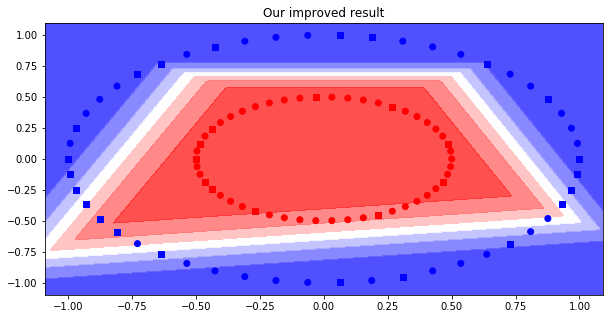

In [0]:
plotResults(net2,X_train,y_train,X_val,y_val,title="Our improved result")

---
# Week 08: Post-Tutorial Work



## 4 Back-propagation

### .a A Toy Example



For most of the people, neural networks are like a black box, especially the Backpropagation algorithm. Backpropagation is a common method to train a neural network, and also one of the hardest parts for understanding neural networks. Fortunately, most of the deep learning packages nowadays can automatically perform backpropagation for you, which relieves you from complicated mathematical derivations. However, backpropagation is still an indispensable part to get an in-depth understanding of neural networks.

I think you have already learned theoretically how backpropagation works in the post-class video. In this post-class notebook, we will lead you to go through a concrete toy example, to help you develop a more intuitive understanding of how backpropagation works. OK, Let's get started. 



For this toy example, we’re going to use a neural network with **a 2-d input, one hidden layer with two neurons and two output neurons.** Additionally, the hidden neurons and the input **will include a bias.**

Here’s the basic structure:
 
 <div align="center">
<img src="https://www.comp.nus.edu.sg/~neamul/Images/CS3244_1910/nn_example_updated.png" width=400>
<p> Figure 1. A Toy Neural Network.  
</div>


To make things easy enough, suppose we only have one input example $x = (2, 3)$, which means that $x_1 = 2$, and $x_2 = 3$. And suppose we have a two dimentional target $y$ for the input $x$, and $y = (0.1, 0.9)$. The loss function is defined as the **square of euclidean distance** between the network output $\mathbf{a}^{[2]}  = (a^{[2]}_1, a^{[2]}_2)$ and the actual target $\mathbf{y} = (y_1, y_2)$, as follows. 

$$
J(\mathbf{a}^{[2]},\mathbf{y}) = \| \mathbf{a}^{[2]} - \mathbf{y} \|_2^2 = (a^{[2]}_1 - y_1)^2 + (a^{[2]}_2 - y_2)^2
$$

Moreover, we initialize the weights for the above network, as follows.

$$
\Theta^{[1]} =  
\begin{bmatrix}
- 0.1 & 0.3 \\
0.2 & - 0.4
\end{bmatrix}, 
\Theta^{[2]} =  
\begin{bmatrix}
0.5 & 0.7 \\
- 0.6 & - 0.8
\end{bmatrix}, 
\mathbf{b}^{[1]} = (0.1, 0.1), \mathbf{b}^{[2]} = (0.1, 0.1)
$$

where the $i$-th row and $j$-th column of $\Theta^{[l]}$ corresponds to $\Theta^{[l]}_{ij}$ and $\mathbf{b}^{[l]}$ is the bias vector that goes into layer $l$. Suppose if $R$ is the desired activation function, we can calculate the output of a node  using the following equation:

$$ \mathbf{a}^{[2]} = R(\Theta^{[2]}\mathbf{a}^{[1]} + \mathbf{b}^{[2]}) $$

where $R$ is applied point-wise to the result. 

The goal of backpropagation is essentially to optimize the weights so that the neural network can learn how to correctly map arbitrary inputs to outputs. In this toy example where we only have one training example $(x,y)$, the problem essentially becomes: given inputs $x_1 = 2$, and $x_2 = 3$, we want the neural network to output $a^{[2]}_1 = 0.1$, and $a^{[2]}_2 = 0.9$, because in this case we will obtain a minimal loss $J(\mathbf  a^{[2]}, \mathbf y) = 0$.

### .b Forward Pass



We will work step-by-step to see how the parameters change after we perform backpropagation on this single training example.  But first, we need to run the forward propagation. Since this is easy, we want you to calculate yourself. 

Note that for hidden layer $(a^{[1]}_1, a^{[1]}_2)$, we use the **ReLU function** as the nonlinearity. The ReLU is the most used activation function in the world right now because, it is used in almost all the convolutional neural networks or deep learning. The formula of ReLU function is as follows. 

$$
R(z) = \max(0, z)
$$

You can refer to the following figure to see the difference between Sigmoid and ReLU function. 

<div align="center">
<img src="https://miro.medium.com/max/726/1*XxxiA0jJvPrHEJHD4z893g.png" width=400>
<p> Figure 2. The ReLU and Sigmoid Function.  </p>
</div>

 (Diagram Credit: From [https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6](https://miro.medium.com/max/726/1*XxxiA0jJvPrHEJHD4z893g.png))
 
 

**Your Turn:** Try to calculate the following values after forward proapagation : $a^{[2]}_1$, $a^{[2]}_2$ and $J(\mathbf a^{[2]}, \mathbf y)$

**N.B.** Try to do it on your own before coming to Tutorial $06$. We will discuss more about this during the tutorial.

### .c Backward Pass



After you obtained the loss $J(\mathbf{a}^{[2]}, \mathbf{y})$ after forward propagation, now you want to update the weights based on the loss. To do this, you have to calculate the gradient, that is the partial derivative of $J(\mathbf{a}^{[2]}, \mathbf{y})$ with respect to $\Theta_{ij}^{[l]}$ and $\mathbf{b}^{[1]}, \mathbf{b}^{[2]}$ and then perform the update as follows. 

$$
\Theta_{ij}^{[2]} = \Theta_{ij}^{[2]}- \alpha \frac{\partial J(\mathbf a^{[2]},\mathbf y)}{\partial \Theta_{ij}^{[2]}} \\
\mathbf b_i^{[2]} = \mathbf  b_i^{[2]} - \alpha \frac{\partial J(\mathbf  a^{[2]}, \mathbf y)}{\partial \mathbf b^{[2]}_i} 
$$

Here $\alpha$ is the learning rate. To calculate the gradients, we need to use the chain rule. So the order of calculating should be backward, i.e. starting from the output layer ($a^{[2]}_1, a^{[2]}_2$), then goes to the hidden layer $\Theta^{[2]}$ and ($a^{[1]}_1, a^{[1]}_2$), and finally the input layer $\Theta^{[1]}$ and $(x_1, x_2)$. 

OK, let us first calculate the gradient with respect to $a^{[2]}_1$ and $a^{[2]}_2$. 

$$
\frac{\partial J(\mathbf  a^{[2]},\mathbf y)}{\partial  a^{[2]}_1} = \frac{\partial }{\partial a^{[2]}_1} \{(a^{[2]}_1 - y_1)^2 + (a^{[2]}_2 - y_2)^2\} = 2 \times (a^{[2]}_1 - y_1)
$$

$$
\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_2} = \frac{\partial }{\partial a^{[2]}_2} \{(a^{[2]}_1 - y_1)^2 + (a^{[2]}_2 - y_2)^2\} = 2 \times (a^{[2]}_2 - y_2)
$$

Then, let us go backward and calculate the gradient of $\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial \Theta_{11}^{[2]}}$. We can rewrite it as following:

$$
\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial \Theta_{11}^{[2]}} = \frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_1}\times \frac{\partial a^{[2]}_1}{\partial \Theta_{11}^{[2]}}
$$

See? In order to calculate $\Theta_{11}^{[2]}$, we use the previous results $\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_1}$, this can be regarded as the error signals $\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_1}$ flows back from $a^{[2]}_1$ to $\Theta_{11}^{[2]}$, the error signal on $\Theta_{11}^{[2]}$ is calculated based on its **local gradient** $\frac{\partial a^{[2]}_1}{\partial \Theta_{11}^{[2]}}$ and **the error signal passed down from higher layers**. This is the intuition of backpropagation. 



Now, it's time for you to do some calculations. To make your calculation easier, suppose we already know the following:

$$
\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_1} = 0.5, \\ \frac{\partial J(\mathbf a^{[2]},\mathbf y)}{\partial a^{[2]}_2} = 0.3,\\ a^{[1]}_1 = 0.5, a^{[1]}_2 = 0.4
$$

**N.B.**: Note that these may not be the correct values for the above graph. We don't want your calculation to go wrong because of your previous errors. Instead, use the provided information here to calculate the following.

**Your Turn:** Calculate the following gradient (partial derivative) 

1. $J(\mathbf a^{[2]}, \mathbf y)$ with respect to $\Theta^{[2]}_{21}$.
2. $J(\mathbf a^{[2]}, \mathbf y)$ with respect to $\Theta^{[2]}_{12}$.

**N.B.** Try to do it on your own before coming to Tutorial $06$. We will discuss more about this during the tutorial.

OK, now we have calculated the gradients for $\Theta^{[1]}$, let us back propagate more to $a^{[1]}_1$ and $a^{[1]}_2$. The partial derivative of $J(\mathbf a^{[2]}, \mathbf y)$ with respect to $a^{[1]}_1$ is as follows. 

$$
\frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a_1^{[1]}} = \frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_1} * \frac{\partial a^{[2]}_1}{\partial a^{[1]}_1} + \frac{\partial J(\mathbf a^{[2]}, \mathbf y)}{\partial a^{[2]}_2} * \frac{\partial a^{[2]}_2}{\partial a^{[1]}_1}
$$

Note that now we have two terms, because there are two paths that influence $h_1$ in the graph: 

$$
J \rightarrow a^{[2]}_1 \rightarrow a^{[1]}_1 \\
J \rightarrow a^{[2]}_2 \rightarrow a^{[1]}_1
$$

When we apply the chain rule, we need to consider both the paths. 

**Your Turn (Question 1):** Which two parameters should be used to calculate the partial derivative of $J(\mathbf a^{[2]}, \mathbf y)$ with respect to $a^{[1]}_2$?

_Choose from: $\Theta^{[2]}_{11}, \Theta^{[2]}_{12}$; $\ \ \ $ $\Theta^{[2]}_{11}, \Theta^{[2]}_{21}$;$\ \ \ $ $\Theta^{[2]}_{21}, \Theta^{[2]}_{22}$;$\ \ \ $ $\Theta^{[2]}_{12}, \Theta^{[2]}_{22}$_

I think by now, you should have understood how back propagation works intuitively. But there is another thing you should pay attention to, $h_1$ is actually the activation after applying the nonlinearity, i.e., ReLU function. So $a^{[1]}_1 = R(s^{[1]}_1)$, and  $a^{[1]}_2 = R(s^{[1]}_2)$, and:

$$
s^{[1]}_1 = \Theta^{[1]}_{11} x_1 + \Theta^{[1]}_{12} x_2 + b^{[1]}_1\\
s^{[1]}_2 = \Theta^{[1]}_{21} x_1 + \Theta^{[1]}_{22} x_2 + b^{[1]}_2
$$

So, don't forget to calculate the gradient $\frac{\partial a^{[1]}_1}{\partial s^{[1]}_1}$ when you perform backpropagation. Since  $\frac{\partial a^{[1]}_1}{\partial s^{[1]}_1}$ is dependent on what nonlinearity function you choose, you may think for your self **why people prefer to use ReLU rather than Sigmoid these days**. Recall the gradient of sigmoid function is given by:

$$
\frac{\partial \sigma(z)}{\partial z} = \sigma(z) (1 - \sigma(z))
$$

**Your Turn (Question 2):** Why people often prefer to use the ReLU function rather than Sigmoid function when choosing nonlinearity?

_Replace with your answer_


## 5 Techniques to improve training

We now want to discuss some techniques that help train better models.

### .a Momentum

The idea behind momentum is that the gradient, even so it might not point into the right direction, on average always points towards a proper good direction. This is especially true for SGD, but we'll stick to the normal gradient decent for this example. 

Going away from Neural Networks for a moment let's assume we want to find the minimum of the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function). Let's further assume we use gradient descent to find the minimum.  **Note:** This function is used as a benchmark for optimization algorithms, because it's known to be difficult.

We define a starting point, the number of steps we want to use, and a learning rate.

In [0]:
startingPoint = np.asarray([0.5,2])
numberOfSteps = 100
learningRate = 0.0003

Next we define the Rosenbrock function, for some given parameters $a, b$ and to save you some time we also defined the derivative of the function.

In [0]:
a  = 1
b  = 100
f  = lambda x,y : (a-x)**2+b*(y-x**2)**2
df = lambda x,y: np.asarray([4*b*x**3-4*b*x*y+2*x-2*a,2*b*(y-x**2)])

By now you should know how much we like to visualize things, so let's go ahead and try to visualize the steps of gradient descent. 

In [0]:
trace = [startingPoint]; # The first point of the trace is our starting point
for step in range(numberOfSteps): # For each step

  lastPoint = trace[-1]                          # We get the last point of our trace
  update =  - df(lastPoint[0],lastPoint[1])      # We calculate the update
  trace.append(lastPoint + learningRate *update) # We add a new point to our trace

# Now we have a list of tuples, for plotting we need two arrays, with the x and y coordinates, respectively.
x_trace,y_trace = np.asarray(trace)[:,0],np.asarray(trace)[:,1]

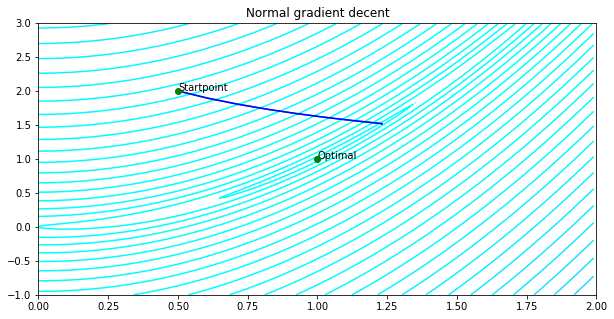

In [0]:
# Standard figure definition
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot(111)
ax.set_xlim(0,2)
ax.set_ylim(-1,3)

# Here we create the data to plot a contour of the underlying funciton
X = np.arange(0, 2, 0.01)
Y = np.arange(-1, 3, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# The next line plots the contour
ax.contour(X, Y, Z, levels=(np.asarray(range(0,50,1))/2)**3,cmap='cool')

# And finally, we plot 
ax.plot(x_trace,y_trace)
ax.set_title("Normal gradient decent")
ax.plot(x_trace,y_trace,c='blue')
ax.annotate('Startpoint', xy=startingPoint)
ax.annotate('Optimal', xy=[1,1])
ax.scatter(x=[startingPoint[0],1],y=[startingPoint[1],1],zorder=10,c='green')
plt.show()

Oh... that doesn't look so good. The solutions jumps from one side to the other instead of going to the minimum.

One way to fix this would be to start a better starting point or to change the learning rate. 

**Your Turn (Question 3):** Try out some other learning rates and starting points. What do you observe?

_Replace with your answer_

#### Programming : Momentum

Now let's try to implement Momentum in it's most basic form. Momentum just means to reuse a part of the last update as a general direction to go to, and it can be written as follows:

$$
\text{update}_{k+1} = \beta \cdot \text{update}_k + \nabla f(\Theta_{k})\\ 
\Theta_{k+1} = \Theta_k + \alpha \cdot \text{update}_{k+1}
$$

where $\beta$ is a parameter for the momentum and $\alpha$ is the normal learning rate.



In [0]:
# This cell just resets the starting point and learning rate, 
# so that the following experiments behave the same for everybody.
startingPoint = np.asarray([0.5,2])
numberOfSteps = 100
learningRate = 0.001

**Your turn (Question 4)**: Please implement the basic version of momentum in the cell below. In the end, `
traceWithMomentum` should contain the coordinates of the trace as tuples.


In [0]:
beta = 0.0
traceWithMomentum = [startingPoint]; # The first point of the trace is our starting point
##########
# Please write your code here, usually about 6 lines of code.
# You may find it useful to reference the previous tracing code block
lastUpdate = 0
for step in range(numberOfSteps): # For each step
  lastPoint = traceWithMomentum[-1]                          # We get the last point of our trace
  update =  lastUpdate * beta - df(lastPoint[0],lastPoint[1])      # We calculate the update
  traceWithMomentum.append(lastPoint + learningRate * update) # We add a new point to our trace
  lastUpdate = update
##########

##########
# The following code converts the list of tuples into two arrays, with the x and y coordinates, respectively.
# We need this for plotting purposes.
x_traceWithMomentum,y_traceWithMomentum = np.asarray(traceWithMomentum)[:,0], np.asarray(traceWithMomentum)[:,1]

Then let's visualise your work:

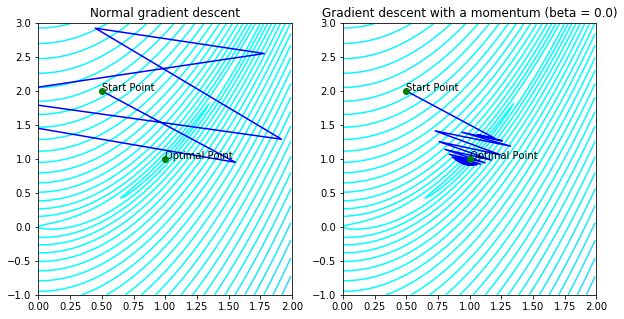

The distance to the optimal point is nan and 0.079146, respectively.


In [0]:
# Standard figure definition
fig = plt.figure(figsize=[10,5])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_xlim(0,2)
ax1.set_ylim(-1,3)
ax2.set_xlim(0,2)
ax2.set_ylim(-1,3)

# The next line plots the contour
ax1.contour(X, Y, Z, levels=(np.asarray(range(0,50,1))/2)**3,cmap='cool')
ax2.contour(X, Y, Z, levels=(np.asarray(range(0,50,1))/2)**3,cmap='cool')

# And finally we plot 
ax1.set_title("Normal gradient descent")
ax1.plot(x_trace,y_trace,c='blue')
ax1.annotate('Start Point', xy=startingPoint)
ax1.annotate('Optimal Point', xy=[1,1])
ax1.scatter(x=[startingPoint[0],1],y=[startingPoint[1],1],zorder=10,c='green')
ax2.set_title("Gradient descent with a momentum (beta = {})".format(beta))
ax2.plot(x_traceWithMomentum,y_traceWithMomentum,c='blue')
ax2.annotate('Start Point', xy=startingPoint)
ax2.annotate('Optimal Point', xy=[1,1])
ax2.scatter(x=[startingPoint[0],1],y=[startingPoint[1],1],zorder=10,c='green')
plt.show()
print("The distance to the optimal point is {:f} and {:f}, respectively.".format(np.linalg.norm(trace[-1]-1),np.linalg.norm(traceWithMomentum[-1]-1)))

**Your Turn (Question 5):** What happens for `beta`$ = 0.1$?

_Choose from: We get a perfect result, The training gets closer, Everything stays the same, The result gets a bit worse, The result is terrible_

**Your Turn (Question 6):** What happens for `beta`$ = 0.8$?

_Choose from: We get a perfect result, The training gets closer, Everything stays the same, The result gets a bit worse, The result is terrible_

**Tip:** If you want to use momentum in in PyTorch, you just have to look at the documentation of the optimizer you use (e.g. type `?? optim.SGD` into a codeblock) 

**Tip:** If you want to learn more about momentum, we highly recommend checking out [this](https://distill.pub/2017/momentum/) Distill article. It also has a better version of our visualization. 

### .b Early Stopping

In earlier lectures we learned about regularization and validation. In this section, we plan to put this into the context of neural networks. One of the benefits of neural networks is that they (theoretically) can learn anything. Unfortunatly, that makes them prone to overfitting. This effect is illustrated in the figure, below while the training error goes down epoch after epoch the Validation error starts to increase after a while. The best time to stop is highlighted with the arrow.

The practice to not train a model until convergence of the training error, but to stop before is referred to as **early stopping**. You can use a validation set to decide when to stop. However, it's not as easy as it might look in the illustration below.

![Here should be the picture of a neural network](https://www.comp.nus.edu.sg/~mstrobel/pict/EarlyStopping.png)

_(Diagram credit: Martin Strobel, NUS; CC BY 4.0)_

To illustrate the how early stopping works and why it's not a trivial thing to do, let's look at an example.  Let's create the following data set: 

In [0]:
# Your success in this course does not depend on udnerstanding the following lines of code. 
# They just create an odd dataset (i.e., just run them)
X_train = np.concatenate([np.concatenate([np.arange(-2.5,2.5,0.2).reshape([25,1]),0.1*np.ones([25,1])],axis=1),np.concatenate([np.arange(-2.5,2.5,0.2).reshape([25,1]),-0.1* np.ones([25,1])],axis=1)]) 
y_train  = np.ones(50)
y_train[25:] = -1
y_train[10] = -1
y_train[11] = -1
X_val = X_train.copy()
X_val[:,0] = X_val[:,0] +  0.1
y_val  = np.ones(50)
y_val[25:] = -1

We illustrate the data set below. You can see it's almost linearly separable. We just changed the label of two training points. You can think of this as noise or error.

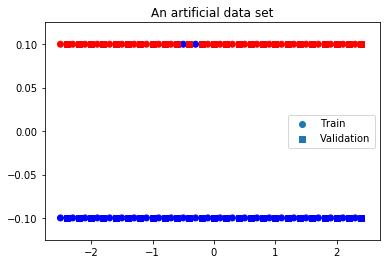

In [0]:
# This is how the dataset looks like
plt.title("An artificial data set")
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap="bwr")
plt.scatter(X_val[:,0],X_val[:,1],c=y_val,cmap="bwr",marker="s")
plt.legend(["Train","Validation"])
plt.show()

We use the same steps as above to create and train a neural network.

In [0]:
# NOTE: Please do not change this block of code as we need them for reproducibility
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [0]:
# Here we again transform our numpy arrays to Tensors
X_train_T, X_val_T, y_train_T, y_val_T = torch.from_numpy(X_train),torch.from_numpy(X_val), torch.from_numpy(y_train), torch.from_numpy(y_val)
# Here we again create data loaders
trainloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train_T.float(),y_train_T.float().view(-1,1)), batch_size=100)
validationloader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_val_T.float(),y_val_T.float().view(-1,1)), batch_size=100)

In [0]:
# This is the architecture we use for this experiment.
netWeightDecay = nn.Sequential(
    nn.Linear(2, 3),
    nn.Tanh(),
    nn.Linear(3,3),
    nn.Tanh(),
    nn.Linear(3,1),
    nn.Sigmoid(),
).float()

In [0]:
opt = optim.SGD(netWeightDecay.parameters(),lr=1e-1,weight_decay=0.0)

In [0]:
# This is the first time we actually want to look at the loss in each epoch in detail, so we save it in two variables
trainingLosses,validationLosses =  train(netWeightDecay,trainloader,validationloader,loss,opt,n_epochs=1000)

Epoch: 5 Training loss: 0.388267 Validation loss: 0.415326
Epoch: 10 Training loss: 0.264097 Validation loss: 0.322569
Epoch: 15 Training loss: 0.169862 Validation loss: 0.255110
Epoch: 20 Training loss: 0.096793 Validation loss: 0.205264
Epoch: 25 Training loss: 0.038836 Validation loss: 0.167777
Epoch: 30 Training loss: -0.008211 Validation loss: 0.139057
Epoch: 35 Training loss: -0.047268 Validation loss: 0.116653
Epoch: 40 Training loss: -0.080375 Validation loss: 0.098878
Epoch: 45 Training loss: -0.108980 Validation loss: 0.084558
Epoch: 50 Training loss: -0.134119 Validation loss: 0.072865
Epoch: 55 Training loss: -0.156551 Validation loss: 0.063201
Epoch: 60 Training loss: -0.176839 Validation loss: 0.055133
Epoch: 65 Training loss: -0.195410 Validation loss: 0.048336
Epoch: 70 Training loss: -0.212590 Validation loss: 0.042565
Epoch: 75 Training loss: -0.228635 Validation loss: 0.037632
Epoch: 80 Training loss: -0.243748 Validation loss: 0.033394
Epoch: 85 Training loss: -0.25

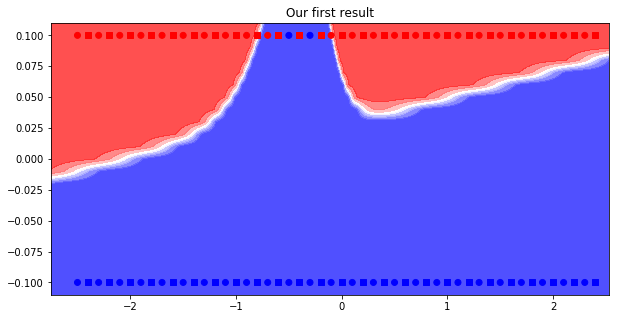

In [0]:
# Let's look at the final result
plotResults(netWeightDecay,X_train,y_train,X_val,y_val,title="Our first result")

As expected, the neural network overfits and so misclassifies some of the points in the validation set.

Could we have solved the problem with early stopping? Let's take a look.

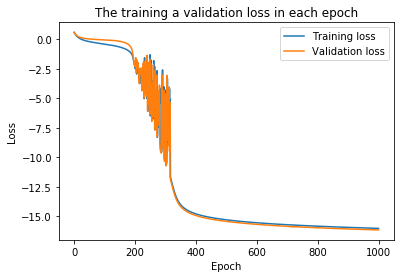

In [0]:
plt.title("The training a validation loss in each epoch")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(trainingLosses)
plt.plot(validationLosses)
plt.legend(["Training loss","Validation loss"])

**Your Turn (Question 7):** Would it have been a good idea to stop the first time the validation error goes up?

_Choose from: Yes, No_

**Your Turn (Question 8):** What seems to be a good epoch to stop after (at least in this experiment)? You might want to run it more then once.

_Replace with your answer_

**Your Turn (Question 9):** Did it work as expected? If not what seems to be the issue?

_Replace with your answer_

This experiment is not ment to discourage you from using early stopping. It's mostly to show that in practice things often don't look as pretty as on lecture slides.

### .c Weight Decay

Now let's turn to the second trick of this section: _weight decay_. Weight decay is actually a method we already discussed. It's a technique to supress unnecessarily high weights in a network. It's (ignoring some technical details) the same as L2 regularization. 

You might have spotted the ```weight_decay``` parameter in the definition of the optimizer in the code above. Currently, it is set to 0. Can we solve the problem of the noisy data using weight decay?

**Your Turn (Question 10):** For what `weight_decay` value can we get a classifier that correctly classifies the points in the validation set?

_Replace with your answer_


This comes to the end of this notebook.  Please submit your work to the IVLE workbin for by the appropriate deadline.  Don't forget to do your pre-class video watching and work in the subsequent notebook. 

# Further Resources

* http://neuralnetworksanddeeplearning.com/index.html (30/07/18)
* https://www.deeplearningbook.org/ (23/07/18)



---
# Credits
Authored by Lee Yi Quan, Poh Jie, Mohammad Neamul Kabir, Martin Strobel, Liangming Pan, [Min-Yen Kan](http://www.comp.nus.edu.sg/~kanmy) (2019), affiliated with [WING](http://wing.comp.nus.edu.sg), [NUS School of Computing](http://www.comp.nus.edu.sg) and [ALSET](http://www.nus.edu.sg/alset).
Licensed as: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/ ) (CC BY 4.0).
Please retain and add to this credits cell if using this material as a whole or in part.
Other Credits (inclusive of photos): 